# Data Science Project — Individual Planning Report
**Name:** Mansehaj Randhawa 
**Course:** DSCI 100  
**Date:** 2025-11-11  



**1) Data Desciptions**

The project data come from two files collected on a UBC research Minecraft server used to study player behaviour. 

The **players.csv** dataset contains 196 observations and 7 variables describing each unique player. These include: 
- `experience`, person's gaming experience level
- `subscribe`, whether the player opted into a newsletter (TRUE or FALSE)
- `hashedEmail`, an anonymized identifier used to link players to their sessions
- `played_hours`, the total number of hours the player has spent on the server
- `name`, the person’s provided display name
- `gender`, the person's gender
- `Age`, the person’s age in years.

The **sessions.csv** dataset contains 1,535 session logs with 5 variables: 
- `hashedEmail`, linking each session to a player
- `start_time` and `end_time`, character timestamps recording when a session began and ended
- `original_start_time` and `original_end_time`, numeric timestamps capturing the same information in millisecond format.


Potential data issues include: 
- two missing ages in `players.csv`, two missing `end_time` entries in `sessions.csv`
- there may be data inconsistencies between string and numeric timestamps
- skewed gameplay hours because not enough people frequently game.

Since my question revolves around the player count and session times, the variables `Age`, `gender`, `name`, `subscribe`, and `experience` are not relevant to me and can be completely left out. Depending on how I try to answer my questios later, I might want to keep the variable `name` as an indicator for myself or others when referencing data.



**2) Questions**

**Broad Question (Q3):**  
We are interested in demand forecasting, namely, what time windows are most likely to have large number of simultaneous players. This is because we need to ensure that the number of licenses on hand is sufficiently large to accommodate all parallel players with high probability. 

**Specific Question:**  
At what hours and days does the Minecraft research server experience the highest concurrent player counts?

In [1]:
# Load Data
library(tidyverse)
library(readr)

players  <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

head(players)
head(sessions)

-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.4.2     v purrr   1.0.2
v tibble  3.2.1     v dplyr   1.1.4
v tidyr   1.3.1     v stringr 1.5.0
v readr   2.1.5     v forcats 1.0.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Rows: 196 Columns: 7
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

i Use `spec()` to retrieve the full column

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [2]:
players_wrangled  <- players
sessions_wrangled <- sessions

sessions_wrangled <- sessions_wrangled |>
  mutate(
    hour  = as.numeric(substr(start_time, 12, 13)),
    date  = as.Date(substr(start_time, 1, 10)),
    weekday = weekdays(date)  
  )

sessions_wrangled |>
  select(hashedEmail, hour, weekday) |>
  head()

hashedEmail,hour,weekday
<chr>,<dbl>,<chr>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,18,Thursday
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,23,Tuesday
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,17,Sunday
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,3,Sunday
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,16,Tuesday
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,15,Tuesday


In [3]:
# Mean of quantitative variables in players.csv

players_means <- players_wrangled |>
  select(where(is.numeric)) |>
  summarise(across(everything(), ~ round(mean(.x, na.rm = TRUE), 2))) |>
  pivot_longer(everything(),
               names_to = "variable",
               values_to = "mean_value")

players_means

variable,mean_value
<chr>,<dbl>
played_hours,5.85
Age,21.14


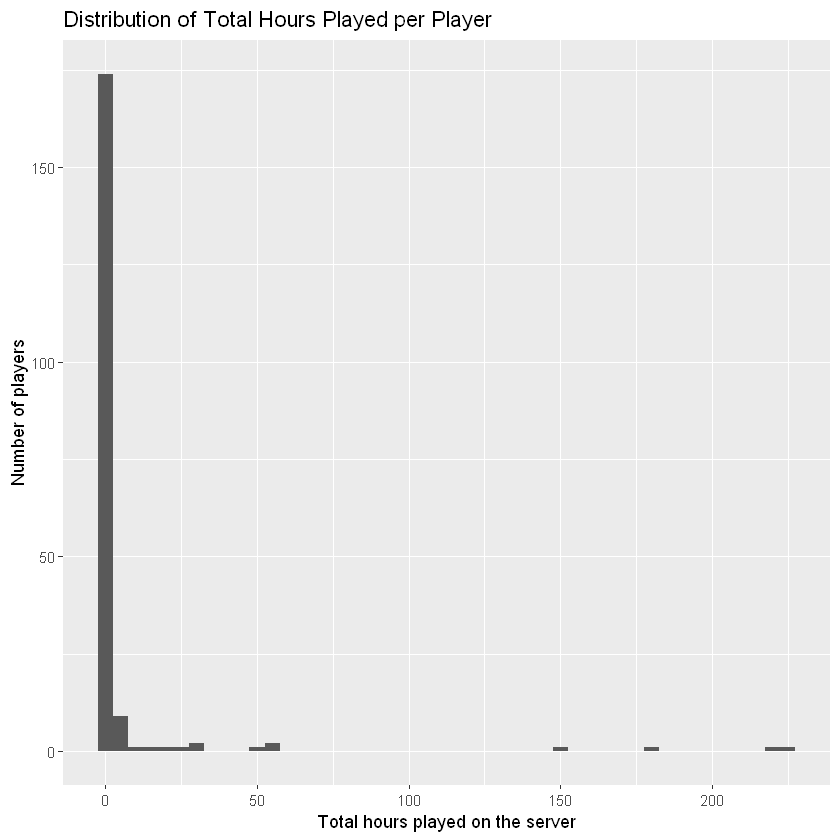

In [7]:
ggplot(players_wrangled, aes(x = played_hours)) +
  geom_histogram(binwidth = 5) +
  labs(
    title = "Distribution of Total Hours Played per Player",
    x = "Total hours played on the server",
    y = "Number of players"
  )


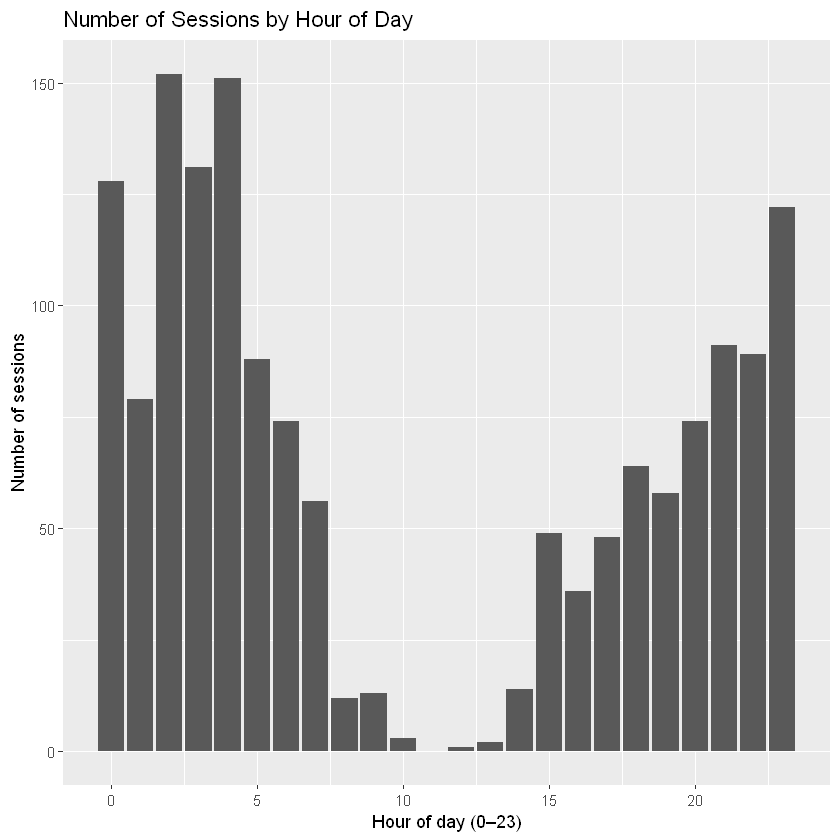

In [8]:
sessions_by_hour <- sessions_wrangled |>
  group_by(hour) |>
  summarise(number_of_sessions = n())

ggplot(sessions_by_hour, aes(x = hour, y = number_of_sessions)) +
  geom_col() +
  labs(
    title = "Number of Sessions by Hour of Day",
    x = "Hour of day (0–23)",
    y = "Number of sessions"
  )

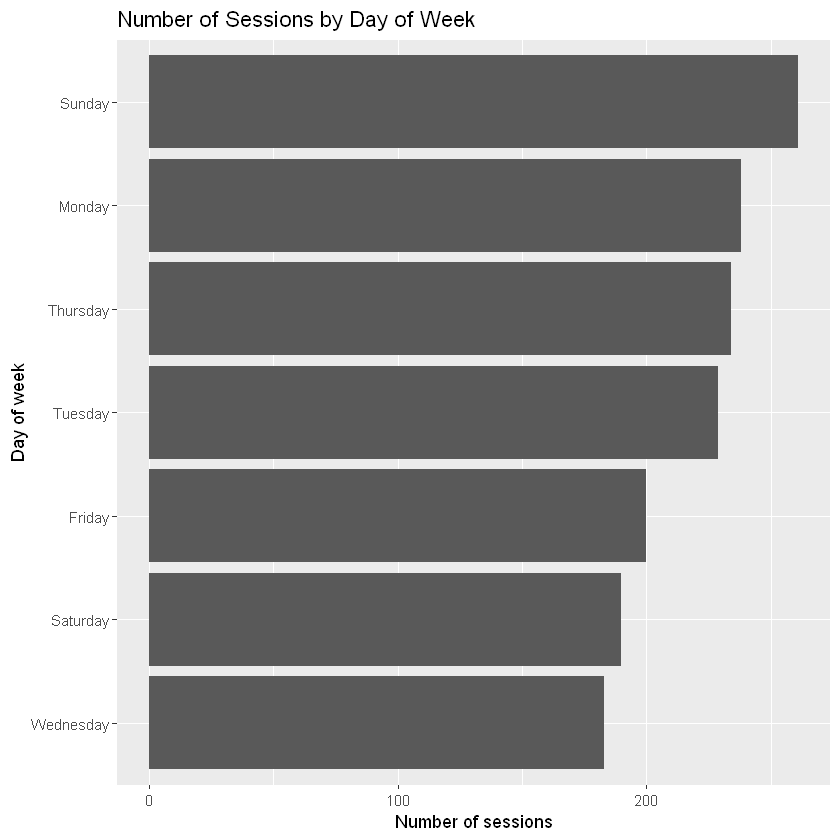

In [9]:
sessions_by_weekday <- sessions_wrangled |>
  group_by(weekday) |>
  summarise(number_of_sessions = n())

ggplot(sessions_by_weekday,
       aes(x = reorder(weekday, number_of_sessions),
           y = number_of_sessions)) +
  geom_col() +
  coord_flip() +
  labs(
    title = "Number of Sessions by Day of Week",
    x = "Day of week",
    y = "Number of sessions"
  )
